In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

c:\Users\TiTO.tech\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


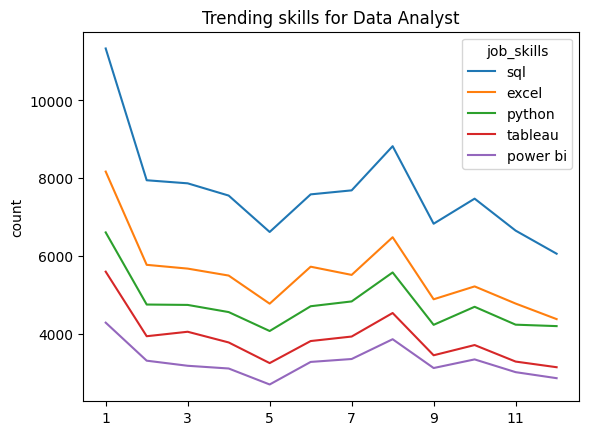

In [11]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA['month_abbr'] = df_DA['job_posted_date'].dt.strftime('%b')
df_DA_exploaded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploaded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot.loc['total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('total')
df_DA_pivot.iloc[:, :5].plot(kind= 'line')
plt.title('Trending skills for Data Analyst')
plt.xlabel('')
plt.ylabel('count')
plt.show()

In [12]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Count')

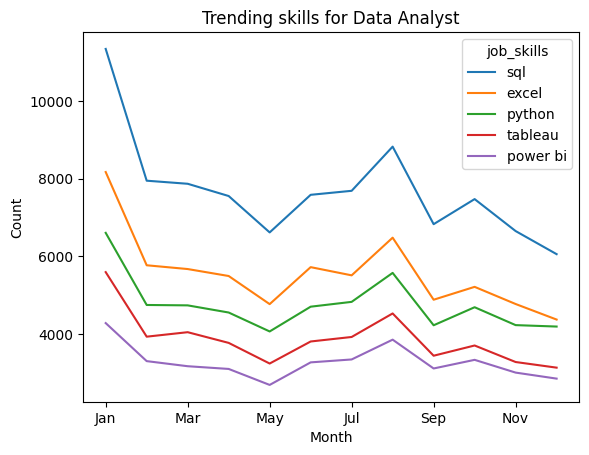

In [23]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA['month_abbr'] = df_DA['job_posted_date'].dt.strftime('%b')
df_DA_exploaded = df_DA.explode('job_skills')

# Use month_abbr as index for pivot table
df_DA_pivot = df_DA_exploaded.pivot_table(index='month_abbr', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.loc['total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('total')

# Reindex months to ensure correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_DA_pivot = df_DA_pivot.reindex(month_order).dropna(how='all')

df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Trending skills for Data Analyst')
plt.xlabel('Month')
plt.ylabel('Count')

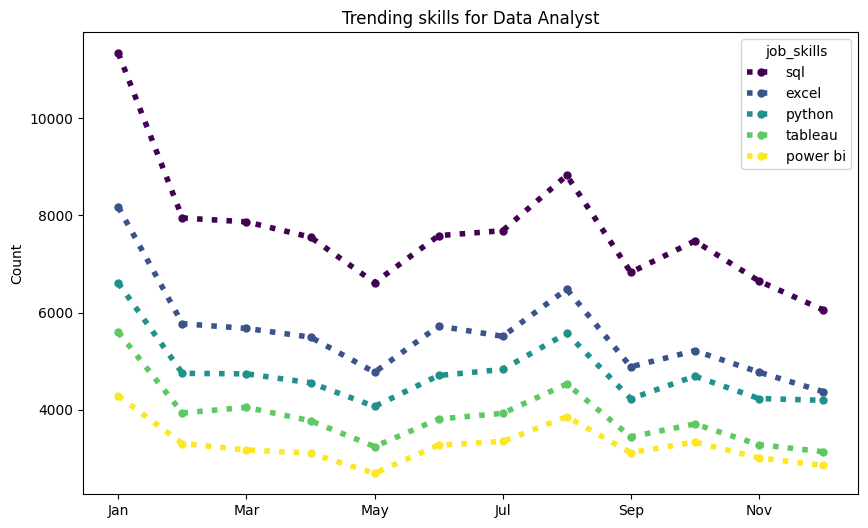

In [34]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':',
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(10, 6)
    
    )
plt.title('Trending skills for Data Analyst')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

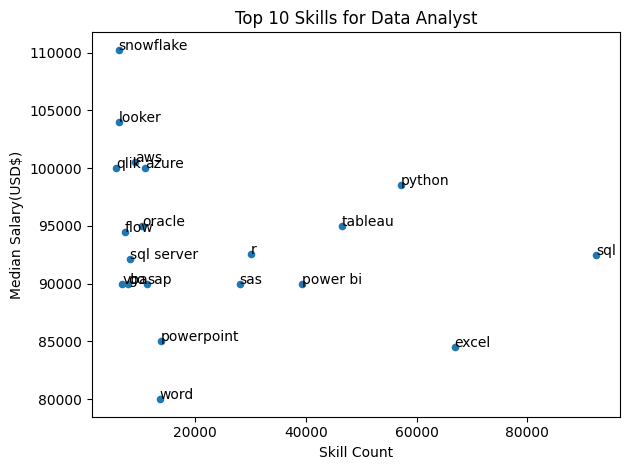

In [36]:
df = df[df['job_title_short'] == 'Data Analyst']

df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count= ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary',)
plt.title('Top 10 Skills for Data Analyst')
plt.xlabel('Skill Count')
plt.ylabel('Median Salary(USD$)')
plt.tight_layout()
for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i], txt)
plt.show()

In [40]:
!pip install adjustText
from adjustText import adjust_text

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
    --------------------------------------- 0.5/38.6 MB 4.2 MB/s eta 0:00:10
   - -------------------------------------- 1.6/38.6 MB 4.0 MB/s eta 0:00:10
   -- ------------------------------------- 2.4/38.6 MB 4.1 MB/s eta 0:00:09
   --- ------------------------------------ 3.1/38.6 MB 4.0 MB/s eta 0:00:09
   ---- ----------------------------------- 3.9/38.6 MB 4.0 MB/s eta 0:00:09
   ---- ----------------------------------- 4.7/38.6 MB 4.0 MB/s eta 0:00:09
   ----- ---------------------------------- 5.8/38.6 MB 4.0 MB/s eta 0:00:09
   ------ --------------------------------- 6.0/38.6 MB 4.0 MB/s eta 0:00:09
   ------ --------------------------------- 6.6/38.6 MB 3.5 MB/s eta 0:00:10
   ------- -------------------------------- 7.6/38.6 MB 3.8 MB/s eta 0:00:09
   -------- ------------------------------- 8.7/38.6 MB 3.8 MB/s eta 0:00:08
   --------- ------------------------------ 9.4/38.6 MB 3.8 MB/s eta 0:00:08
   ---

In [45]:
from adjustText import adjust_text

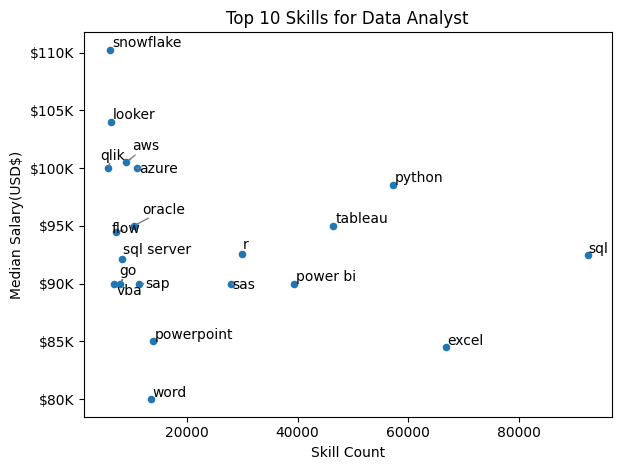

In [57]:



from adjustText import adjust_text
df = df[df['job_title_short'] == 'Data Analyst']

df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count= ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary',)
plt.title('Top 10 Skills for Data Analyst')
plt.xlabel('Skill Count')
plt.ylabel('Median Salary(USD$)')
plt.tight_layout()
Texts = []
for i,txt in enumerate(skill_stats.index):
    Texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i], txt))
    

adjust_text(Texts, arrowprops=dict(arrowstyle='->', color='gray' , lw=1))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))
